In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab_Notebooks/BML')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/betteridiot/seqlogo.git#egg=seqlogo

  Cloning https://github.com/betteridiot/seqlogo.git to /tmp/pip-install-k1so1fcq/seqlogo_3b0f959cd435408fb6e08e8aef9a8f0d
  Running command git clone --filter=blob:none --quiet https://github.com/betteridiot/seqlogo.git /tmp/pip-install-k1so1fcq/seqlogo_3b0f959cd435408fb6e08e8aef9a8f0d
  Resolved https://github.com/betteridiot/seqlogo.git to commit f265220fbad4962e13a061311b86cee5170c937b
  Preparing metadata (setup.py) ... done
  Created wheel for seqlogo: filename=seqlogo-5.29.8-py2.py3-none-any.whl size=19401 sha256=2ee644d581019b5e5eec4d73516bdd073e9ac8fac58f3271daf44ae5791f49e3
  Stored in directory: /tmp/pip-ephem-wheel-cache-pr72qhjq/wheels/af/d5/b2/51372fee875a49d96e034e1457bde673ab2caf297e4870d5a4
Successfully built seqlogo


**CHATGPT** 範例檔

In [ ]:
import numpy as np
import pandas as pd
import seqlogo

ModuleNotFoundError: ignored

In [ ]:
# Setting seed for demonstration purposes
np.random.seed(42)

# Making some fake Position Frequency Data (PFM)
pfm = pd.DataFrame(np.random.randint(0, 36, size=(8, 4)))

# Convert to Position Weight Matrix (PWM)
pwm = seqlogo.pfm2pwm(pfm)
pwm

,A,C,G,T
0,0.698830,-0.301170,-1.301170,0.213404
1,0.263034,0.552541,-0.584962,-0.584962
2,0.148523,0.754244,0.148523,-3.375039
3,0.182864,-4.209453,0.314109,0.648528
4,-4.000000,0.321928,1.000000,-0.540568
5,-0.222392,-0.029747,0.085730,0.140178
6,0.697437,0.597902,-2.209453,-0.624491
7,0.736966,-0.584962,0.502500,-2.000000


In [ ]:
pfm

,0,1,2,3
0,28,14,7,20
1,18,22,10,10
2,23,35,23,2
3,21,1,23,29
4,1,20,32,11
5,21,24,26,27
6,15,14,2,6
7,20,8,17,3


# Positive PWM

In [ ]:
import numpy as np
import pandas as pd

2023/11/9 PM 1:35 開始創建 Positive 的 PWM

In [ ]:
def parse_fasta(filepath):
  """
  This function is used to deal with fasta file without external library
  """

  with open(filepath, 'r') as file:
    # Initialize variables
    sequence = []
    header = None
    sequence_parts = []

    # Read the FASTA file line by line
    for line in file:
      line = line.strip()
      if line.startswith('>'): # Header line
        if header: # If there is a header, we've reached a new sequence; save the previous one
          sequence.append({'header':header, 'sequence':''.join(sequence_parts)})
        header = line[1:] # Get the header, excluding the '>'
        sequence_parts = [] # Reset the sequence list
      else:
        sequence_parts.append(line) # Sequence line; append to the list

    # After the last header, there will be a sequence to add
    if header and sequence_parts:
      sequence.append({'header':header, 'sequence':''.join(sequence_parts)})
    return sequence

# Parse the fasta file
fasta_sequence = parse_fasta('/content/drive/MyDrive/Colab_Notebooks/BML/Ass2/CD_HIT_Pos.fasta')

# Show the first few entries
fasta_sequence[:5]


[{'header': 'Q2RBM4 Oryza sativa subsp. japonica_405',
  'sequence': 'PMAAMFGGIVGQEVVKACSGKFHPLYQFFYF'},
 {'header': 'A0A4S4ESM7 Camellia sinensis var. sinensis_420',
  'sequence': 'IQTLDDHALSPDVQEKLVRENPPEGVFKIKG'},
 {'header': 'A0A4S4E3R0 Camellia sinensis var. sinensis_42',
  'sequence': 'CGKLRFYCWDTAGQEKFGGLRDGYYIHGQCA'},
 {'header': 'B9FBI5 Oryza sativa subsp. japonica_57',
  'sequence': 'MGRTGSRGQVTQVRVKFLDDQNRLIMRNVKG'},
 {'header': 'A0A0P0XUE4 Oryza sativa subsp. japonica_120',
  'sequence': 'IPGRATGAYSHSQGIKGLRDAIAAGIASRDG'}]

In [ ]:
df = pd.DataFrame(fasta_sequence)

sequence = df.iloc[:,1]
sequence

0       PMAAMFGGIVGQEVVKACSGKFHPLYQFFYF
1       IQTLDDHALSPDVQEKLVRENPPEGVFKIKG
2       CGKLRFYCWDTAGQEKFGGLRDGYYIHGQCA
3       MGRTGSRGQVTQVRVKFLDDQNRLIMRNVKG
4       IPGRATGAYSHSQGIKGLRDAIAAGIASRDG
                     ...               
4955    EAAARIQGAFREKALKAARSSVIQFANKEEE
4956    HVGPSGHKARLCGVFKYESWRGTHYWEKAGV
4957    LKPRREGQHTQEELQKINLRDELEERERRHF
4958    GKGIRVSCNLPERYMKQTVYGDGVRLQQILS
4959    SAAARIRLDLSSSSGKKTRQASENKKKTLKV
Name: sequence, Length: 4960, dtype: object

## 創建 Matrix for Mapping

In [ ]:
import numpy as np

# Create a 21x31 dimensional matrix
matrix = np.zeros((21, 31))

matrix.shape, matrix

((21, 31),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
# mapping 21 amino acid(including X) to the row of matrix
aa_list = 'ACDEFGHIKLMNPQRSTVWY-'

aa2row = {aa: index for index, aa in enumerate(aa_list)} # create a dict for aa


# Define the function to update the matrix
def update_matrix(matrix, sequence, aa2row):
  for position, amino_acid in enumerate(sequence):
    if amino_acid in aa2row:
      row_index = aa2row[amino_acid]
      matrix[row_index, position] += 1 # Update the matrix


In [ ]:
for seq in sequence: # 這樣就可以遍歷一個df
    update_matrix(matrix, seq, aa2row)


## PFM

In [ ]:
matrix # 數字後面有點表示為float(浮點數)

array([[ 436.,  433.,  448.,  454.,  422.,  405.,  415.,  418.,  448.,
         464.,  510.,  473.,  442.,  462.,  456.,    0.,  503.,  470.,
         437.,  458.,  449.,  433.,  438.,  448.,  418.,  420.,  408.,
         418.,  430.,  445.,  449.],
       [  73.,   54.,   59.,   58.,   50.,   74.,   55.,   38.,   31.,
          35.,   60.,   44.,   34.,   53.,   44.,    0.,   39.,   46.,
          29.,   25.,   58.,   49.,   43.,   43.,   57.,   46.,   53.,
          56.,   69.,   60.,   74.],
       [ 308.,  317.,  284.,  330.,  307.,  287.,  273.,  285.,  298.,
         323.,  309.,  334.,  355.,  348.,  263.,    0.,  357.,  272.,
         334.,  325.,  307.,  270.,  298.,  286.,  291.,  301.,  294.,
         290.,  293.,  285.,  289.],
       [ 395.,  394.,  378.,  431.,  438.,  444.,  434.,  445.,  439.,
         418.,  407.,  557.,  578.,  449.,  588.,    0.,  518.,  428.,
         541.,  521.,  447.,  421.,  436.,  421.,  371.,  398.,  422.,
         418.,  386.,  417.,  379.],


In [ ]:
df_matrix = pd.DataFrame(matrix, index=list(aa_list))
df_matrix

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
A,436.0,433.0,448.0,454.0,422.0,405.0,415.0,418.0,448.0,464.0,...,433.0,438.0,448.0,418.0,420.0,408.0,418.0,430.0,445.0,449.0
C,73.0,54.0,59.0,58.0,50.0,74.0,55.0,38.0,31.0,35.0,...,49.0,43.0,43.0,57.0,46.0,53.0,56.0,69.0,60.0,74.0
D,308.0,317.0,284.0,330.0,307.0,287.0,273.0,285.0,298.0,323.0,...,270.0,298.0,286.0,291.0,301.0,294.0,290.0,293.0,285.0,289.0
E,395.0,394.0,378.0,431.0,438.0,444.0,434.0,445.0,439.0,418.0,...,421.0,436.0,421.0,371.0,398.0,422.0,418.0,386.0,417.0,379.0
F,142.0,161.0,155.0,137.0,152.0,161.0,145.0,136.0,147.0,151.0,...,150.0,149.0,140.0,147.0,157.0,131.0,145.0,155.0,143.0,170.0
G,354.0,386.0,348.0,360.0,329.0,321.0,337.0,341.0,310.0,287.0,...,350.0,366.0,324.0,352.0,350.0,371.0,318.0,388.0,387.0,367.0
H,95.0,85.0,89.0,104.0,105.0,83.0,92.0,82.0,88.0,97.0,...,92.0,88.0,88.0,104.0,102.0,104.0,98.0,81.0,96.0,87.0
I,201.0,220.0,247.0,208.0,233.0,239.0,213.0,199.0,243.0,261.0,...,237.0,224.0,241.0,232.0,266.0,210.0,252.0,220.0,205.0,235.0
K,356.0,367.0,369.0,392.0,374.0,401.0,380.0,417.0,385.0,312.0,...,334.0,396.0,399.0,402.0,399.0,435.0,379.0,384.0,395.0,382.0
L,424.0,389.0,402.0,395.0,376.0,377.0,424.0,404.0,376.0,432.0,...,415.0,327.0,365.0,381.0,380.0,360.0,420.0,400.0,390.0,388.0


In [ ]:
# Resetting the column names from -15 to +15
new_columns = list(range(-15, 16))
df_matrix.columns = new_columns

df_matrix  # Display the DataFrame to verify the new column names


,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,...,6,7,8,9,10,11,12,13,14,15
A,436.0,433.0,448.0,454.0,422.0,405.0,415.0,418.0,448.0,464.0,...,433.0,438.0,448.0,418.0,420.0,408.0,418.0,430.0,445.0,449.0
C,73.0,54.0,59.0,58.0,50.0,74.0,55.0,38.0,31.0,35.0,...,49.0,43.0,43.0,57.0,46.0,53.0,56.0,69.0,60.0,74.0
D,308.0,317.0,284.0,330.0,307.0,287.0,273.0,285.0,298.0,323.0,...,270.0,298.0,286.0,291.0,301.0,294.0,290.0,293.0,285.0,289.0
E,395.0,394.0,378.0,431.0,438.0,444.0,434.0,445.0,439.0,418.0,...,421.0,436.0,421.0,371.0,398.0,422.0,418.0,386.0,417.0,379.0
F,142.0,161.0,155.0,137.0,152.0,161.0,145.0,136.0,147.0,151.0,...,150.0,149.0,140.0,147.0,157.0,131.0,145.0,155.0,143.0,170.0
G,354.0,386.0,348.0,360.0,329.0,321.0,337.0,341.0,310.0,287.0,...,350.0,366.0,324.0,352.0,350.0,371.0,318.0,388.0,387.0,367.0
H,95.0,85.0,89.0,104.0,105.0,83.0,92.0,82.0,88.0,97.0,...,92.0,88.0,88.0,104.0,102.0,104.0,98.0,81.0,96.0,87.0
I,201.0,220.0,247.0,208.0,233.0,239.0,213.0,199.0,243.0,261.0,...,237.0,224.0,241.0,232.0,266.0,210.0,252.0,220.0,205.0,235.0
K,356.0,367.0,369.0,392.0,374.0,401.0,380.0,417.0,385.0,312.0,...,334.0,396.0,399.0,402.0,399.0,435.0,379.0,384.0,395.0,382.0
L,424.0,389.0,402.0,395.0,376.0,377.0,424.0,404.0,376.0,432.0,...,415.0,327.0,365.0,381.0,380.0,360.0,420.0,400.0,390.0,388.0


## PFM2PWM

In [ ]:
df_matrix_norm = df_matrix / 4960 # df可以直接做運算 :O
df_matrix_norm

,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,...,6,7,8,9,10,11,12,13,14,15
A,0.087903,0.087298,0.090323,0.091532,0.085081,0.081653,0.083669,0.084274,0.090323,0.093548,...,0.087298,0.088306,0.090323,0.084274,0.084677,0.082258,0.084274,0.086694,0.089718,0.090524
C,0.014718,0.010887,0.011895,0.011694,0.010081,0.014919,0.011089,0.007661,0.006250,0.007056,...,0.009879,0.008669,0.008669,0.011492,0.009274,0.010685,0.011290,0.013911,0.012097,0.014919
D,0.062097,0.063911,0.057258,0.066532,0.061895,0.057863,0.055040,0.057460,0.060081,0.065121,...,0.054435,0.060081,0.057661,0.058669,0.060685,0.059274,0.058468,0.059073,0.057460,0.058266
E,0.079637,0.079435,0.076210,0.086895,0.088306,0.089516,0.087500,0.089718,0.088508,0.084274,...,0.084879,0.087903,0.084879,0.074798,0.080242,0.085081,0.084274,0.077823,0.084073,0.076411
F,0.028629,0.032460,0.031250,0.027621,0.030645,0.032460,0.029234,0.027419,0.029637,0.030444,...,0.030242,0.030040,0.028226,0.029637,0.031653,0.026411,0.029234,0.031250,0.028831,0.034274
G,0.071371,0.077823,0.070161,0.072581,0.066331,0.064718,0.067944,0.068750,0.062500,0.057863,...,0.070565,0.073790,0.065323,0.070968,0.070565,0.074798,0.064113,0.078226,0.078024,0.073992
H,0.019153,0.017137,0.017944,0.020968,0.021169,0.016734,0.018548,0.016532,0.017742,0.019556,...,0.018548,0.017742,0.017742,0.020968,0.020565,0.020968,0.019758,0.016331,0.019355,0.017540
I,0.040524,0.044355,0.049798,0.041935,0.046976,0.048185,0.042944,0.040121,0.048992,0.052621,...,0.047782,0.045161,0.048589,0.046774,0.053629,0.042339,0.050806,0.044355,0.041331,0.047379
K,0.071774,0.073992,0.074395,0.079032,0.075403,0.080847,0.076613,0.084073,0.077621,0.062903,...,0.067339,0.079839,0.080444,0.081048,0.080444,0.087702,0.076411,0.077419,0.079637,0.077016
L,0.085484,0.078427,0.081048,0.079637,0.075806,0.076008,0.085484,0.081452,0.075806,0.087097,...,0.083669,0.065927,0.073589,0.076815,0.076613,0.072581,0.084677,0.080645,0.078629,0.078226


## Download the DataFrame

In [ ]:
df_matrix_norm.to_csv('/content/drive/MyDrive/Colab_Notebooks/BML/Ass2/df_matrix_norm.csv')

挑出每一個位置頻率最高的氨基酸

In [ ]:
import pandas as pd

# Find the maximum value in each column along with the row label(index)
max_value = df_matrix_norm.idxmax()

# Create a df to hold the result
df_max_value = pd.DataFrame(columns=['aa','position','freq'])

# Use pandas.concat instead of DataFrame.append in a loop
frames = []  # List to hold DataFrames to concatenate

for col in df_matrix_norm.columns:
  # Get the row name
  aa_row = df_matrix_norm[col].idxmax()

  # Get the max value
  freq = df_matrix_norm[col].max()

  # Get the result
  df_max_value = pd.DataFrame({'aa': [aa_row], 'position':[col], 'freq':[freq]})
  frames.append(df_max_value)

# Concatenate all the individual DataFrames in frames
df_max_value = pd.concat(frames, ignore_index = True)

df_max_value




NameError: ignored

### 做一個 positive 和 negative 的位置相差表格 (DIFF)

In [ ]:
# Load the two csv PWM file

pos_PWM = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/BML/Ass2/df_matrix_norm.csv")
neg_PWM = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/BML/Ass2/df_matrix_norm_neg.csv")

# Ensure they are comparable

pos_PWM.set_index(pos_PWM.columns[0], inplace = True)
neg_PWM.set_index(neg_PWM.columns[0], inplace = True)

# Cal the Diff
diff = pos_PWM - neg_PWM

# Save the result
result_filepath = '/content/drive/MyDrive/Colab_Notebooks/BML/Ass2/df_diff_csv'
diff.to_csv(result_filepath)

diff

,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,...,6,7,8,9,10,11,12,13,14,15
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
A,0.007850,0.009478,0.011359,0.010815,0.004868,0.000962,0.002526,0.007012,0.013166,0.012113,...,0.009744,0.013782,0.015319,0.007836,0.007468,0.006006,0.009005,0.009245,0.015937,0.011295
C,-0.001575,-0.003359,-0.002616,-0.004306,-0.004697,-0.000257,-0.004167,-0.008339,-0.008979,-0.009475,...,-0.005084,-0.005444,-0.005125,-0.002993,-0.006141,-0.004437,-0.002371,-0.000813,-0.003000,0.000381
D,0.001392,0.003366,-0.000735,0.006386,-0.001307,-0.002549,-0.005212,-0.001172,-0.003308,0.005639,...,-0.001325,-0.000677,-0.004000,0.001101,0.003968,-0.000181,-0.000110,0.002355,0.000397,0.000140
E,0.004953,0.001641,-0.001850,0.008942,0.010778,0.012307,0.012470,0.011658,0.007099,0.006294,...,0.011577,0.008754,0.006926,-0.003421,0.003936,0.010582,0.007251,-0.000636,0.006677,0.001116
F,-0.006667,-0.005786,-0.005694,-0.010333,-0.005820,-0.005361,-0.009676,-0.010906,-0.010762,-0.008600,...,-0.007605,-0.006584,-0.006166,-0.006775,-0.005928,-0.009575,-0.005530,-0.006703,-0.007794,-0.004636
G,0.002746,0.008082,0.001670,0.003743,-0.004606,-0.006565,0.000037,-0.001177,-0.004636,-0.011745,...,0.003535,0.007505,0.000924,0.002715,0.001780,0.006759,-0.001774,0.012232,0.009665,0.007494
H,-0.001897,-0.003487,-0.004914,-0.001889,-0.001661,-0.006442,-0.002501,-0.006272,-0.003600,-0.002344,...,-0.003379,-0.003308,-0.004291,-0.000800,-0.001230,0.000184,-0.001079,-0.005171,-0.002333,-0.003722
I,-0.008007,-0.005931,-0.000408,-0.005373,-0.001529,0.000398,-0.006837,-0.010191,-0.000789,0.002415,...,-0.002902,-0.003237,0.000536,-0.001943,0.002971,-0.005528,0.001610,-0.005904,-0.008051,-0.002056
K,0.022897,0.024052,0.026741,0.032707,0.029583,0.037498,0.037835,0.044710,0.041315,0.030850,...,0.000149,0.007732,0.008470,0.013115,0.009188,0.016499,0.006033,0.009858,0.009285,0.008604


In [ ]:
# Function to get the max and min values along with row and column names
def get_max_min_values(df):
    max_values = []
    min_values = []
    for col in df.columns:
        max_value = df[col].max()
        min_value = df[col].min()
        max_row = df[col].idxmax()
        min_row = df[col].idxmin()
        max_values.append((max_row, col, max_value))
        min_values.append((min_row, col, min_value))
    return max_values, min_values

# Get the max and min values for the difference DataFrame
max_values_diff, min_values_diff = get_max_min_values(diff)

# Convert the max and min values to DataFrames for easy viewing
df_max_values_diff = pd.DataFrame(max_values_diff, columns=['Row', 'Column', 'Max Value'])
df_min_values_diff = pd.DataFrame(min_values_diff, columns=['Row', 'Column', 'Min Value'])

df_max_values_diff

,Row,Column,Max Value
0,K,-15,0.022897
1,K,-14,0.024052
2,K,-13,0.026741
3,K,-12,0.032707
4,K,-11,0.029583
5,K,-10,0.037498
6,K,-9,0.037835
7,K,-8,0.044710
8,K,-7,0.041315
9,K,-6,0.030850


In [ ]:
df_min_values_diff

,Row,Column,Min Value
0,S,-15,-0.017710
1,S,-14,-0.018067
2,S,-13,-0.020054
3,S,-12,-0.016818
4,L,-11,-0.014267
5,S,-10,-0.019744
6,S,-9,-0.014229
7,S,-8,-0.016924
8,S,-7,-0.022017
9,G,-6,-0.011745


In [ ]:
# Combine the max and min values into a single DataFrame for easy comparison
combined_df = pd.merge(df_max_values_diff, df_min_values_diff, on='Column', suffixes=('_Max', '_Min'))

combined_df.to_csv("/content/drive/MyDrive/Colab_Notebooks/BML/Ass2/combined_dif_df")
combined_df

,Row_Max,Column,Max Value,Row_Min,Min Value
0,K,-15,0.022897,S,-0.017710
1,K,-14,0.024052,S,-0.018067
2,K,-13,0.026741,S,-0.020054
3,K,-12,0.032707,S,-0.016818
4,K,-11,0.029583,L,-0.014267
5,K,-10,0.037498,S,-0.019744
6,K,-9,0.037835,S,-0.014229
7,K,-8,0.044710,S,-0.016924
8,K,-7,0.041315,S,-0.022017
9,K,-6,0.030850,G,-0.011745


### Log

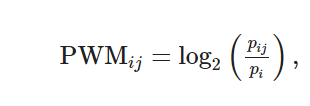

In [ ]:
log = np.log2(pos_PWM/neg_PWM)
log

,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,...,6,7,8,9,10,11,12,13,14,15
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
A,0.134958,0.165803,0.193902,0.181397,0.085002,0.017102,0.044235,0.125323,0.227306,0.200060,...,0.170739,0.244796,0.268132,0.140791,0.133203,0.109373,0.163033,0.162687,0.282149,0.192271
C,-0.146639,-0.387922,-0.286835,-0.452359,-0.551805,-0.024614,-0.460268,-1.062413,-1.284915,-1.228208,...,-0.599002,-0.703024,-0.670046,-0.333943,-0.733068,-0.501085,-0.274990,-0.081938,-0.319577,0.037336
D,0.032719,0.078067,-0.018409,0.145581,-0.030159,-0.062195,-0.130532,-0.029119,-0.077325,0.130676,...,-0.034704,-0.016162,-0.096758,0.027337,0.097555,-0.004398,-0.002720,0.058692,0.009991,0.003468
E,0.092634,0.030124,-0.034606,0.156662,0.187797,0.213373,0.221817,0.200814,0.120627,0.111986,...,0.211549,0.151336,0.122795,-0.064517,0.072567,0.191623,0.129797,-0.011740,0.119388,0.021219
F,-0.302013,-0.236654,-0.241465,-0.458469,-0.250858,-0.220524,-0.412511,-0.483113,-0.446904,-0.358934,...,-0.323635,-0.285912,-0.285059,-0.297008,-0.247666,-0.446309,-0.249958,-0.280376,-0.345209,-0.183029
G,0.056612,0.158185,0.034746,0.076396,-0.096860,-0.139384,0.000777,-0.024488,-0.103235,-0.266614,...,0.074138,0.154734,0.020551,0.056282,0.036869,0.136627,-0.039380,0.245324,0.190794,0.154050
H,-0.136221,-0.267242,-0.349180,-0.124474,-0.108989,-0.469865,-0.182515,-0.464002,-0.266545,-0.163308,...,-0.241409,-0.246645,-0.312517,-0.054000,-0.083775,0.012694,-0.076720,-0.396866,-0.164183,-0.277633
I,-0.260140,-0.181057,-0.011760,-0.173942,-0.046215,0.011969,-0.213146,-0.326555,-0.023043,0.067779,...,-0.085066,-0.099881,0.015990,-0.058731,0.082230,-0.177057,0.046470,-0.180294,-0.256775,-0.061290
K,0.554307,0.567166,0.642597,0.770633,0.718630,0.899197,0.982371,1.094827,1.096252,0.972668,...,0.003203,0.146963,0.160512,0.254659,0.174969,0.300672,0.118646,0.196494,0.178846,0.170912


In [ ]:
# Function to get the max and min values along with row and column names
def get_max_min_values(df):
    max_values = []
    min_values = []
    for col in df.columns:
        max_value = df[col].max()
        min_value = df[col].min()
        max_row = df[col].idxmax()
        min_row = df[col].idxmin()
        max_values.append((max_row, col, max_value))
        min_values.append((min_row, col, min_value))
    return max_values, min_values

# Get the max and min values for the difference DataFrame
max_values_diff, min_values_diff = get_max_min_values(log)

# Convert the max and min values to DataFrames for easy viewing
df_max_values_diff = pd.DataFrame(max_values_diff, columns=['Row', 'Column', 'Max Value'])
df_min_values_diff = pd.DataFrame(min_values_diff, columns=['Row', 'Column', 'Min Value'])

df_max_values_diff

,Row,Column,Max Value
0,K,-15,0.554307
1,K,-14,0.567166
2,K,-13,0.642597
3,K,-12,0.770633
4,K,-11,0.718630
5,K,-10,0.899197
6,K,-9,0.982371
7,K,-8,1.094827
8,K,-7,1.096252
9,K,-6,0.972668


In [ ]:
df_min_values_diff

,Row,Column,Min Value
0,S,-15,-0.326403
1,W,-14,-0.454502
2,S,-13,-0.366418
3,F,-12,-0.458469
4,C,-11,-0.551805
5,H,-10,-0.469865
6,C,-9,-0.460268
7,C,-8,-1.062413
8,C,-7,-1.284915
9,C,-6,-1.228208


In [ ]:
# Combine the max and min values into a single DataFrame for easy comparison
combined_df = pd.merge(df_max_values_diff, df_min_values_diff, on='Column', suffixes=('_Max', '_Min'))

combined_df.to_csv("/content/drive/MyDrive/Colab_Notebooks/BML/Ass2/combined_df.csv")
combined_df

,Row_Max,Column,Max Value,Row_Min,Min Value
0,K,-15,0.022897,S,-0.017710
1,K,-14,0.024052,S,-0.018067
2,K,-13,0.026741,S,-0.020054
3,K,-12,0.032707,S,-0.016818
4,K,-11,0.029583,L,-0.014267
5,K,-10,0.037498,S,-0.019744
6,K,-9,0.037835,S,-0.014229
7,K,-8,0.044710,S,-0.016924
8,K,-7,0.041315,S,-0.022017
9,K,-6,0.030850,G,-0.011745
